Assignment 2 CSCN8000 Artificial Intelligence Algorithms and Mathematics

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.

Figure out if any preprocessing such as scaling would help here

Draw elbow plot and from that figure out optimal value of k

1: Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [108]:
# Load the Iris dataset
iris = load_iris()
data = iris.data[:, 2:4] 

In [109]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [110]:
from sklearn.metrics import silhouette_score
# Without Scaling
kmeans_no_scaling = KMeans(n_clusters=3, random_state=0)
labels_no_scaling = kmeans_no_scaling.fit_predict(data)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [111]:
# With Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
kmeans_with_scaling = KMeans(n_clusters=3, random_state=0)
labels_with_scaling = kmeans_with_scaling.fit_predict(data_scaled)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [112]:
# Calculate silhouette scores
silhouette_score_no_scaling = silhouette_score(data, labels_no_scaling)
silhouette_score_with_scaling = silhouette_score(data_scaled, labels_with_scaling)

In [113]:
# Visualize the results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

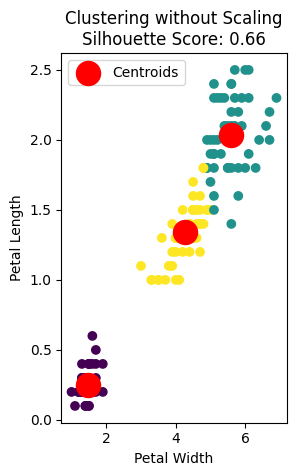

In [114]:
# Without Scaling
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_no_scaling, cmap='viridis')
plt.scatter(
    kmeans_no_scaling.cluster_centers_[:, 0],
    kmeans_no_scaling.cluster_centers_[:, 1],
    s=300,
    c='red',
    label='Centroids'
)
plt.title(f'Clustering without Scaling\nSilhouette Score: {silhouette_score_no_scaling:.2f}')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.legend()

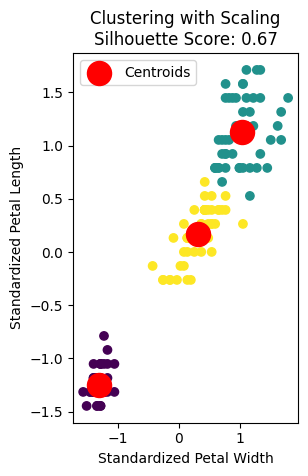

In [115]:
# With Scaling
plt.subplot(1, 2, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_with_scaling, cmap='viridis')
plt.scatter(
    kmeans_with_scaling.cluster_centers_[:, 0],
    kmeans_with_scaling.cluster_centers_[:, 1],
    s=300,
    c='red',
    label='Centroids'
)
plt.title(f'Clustering with Scaling\nSilhouette Score: {silhouette_score_with_scaling:.2f}')
plt.xlabel('Standardized Petal Width')
plt.ylabel('Standardized Petal Length')
plt.legend()

In [116]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

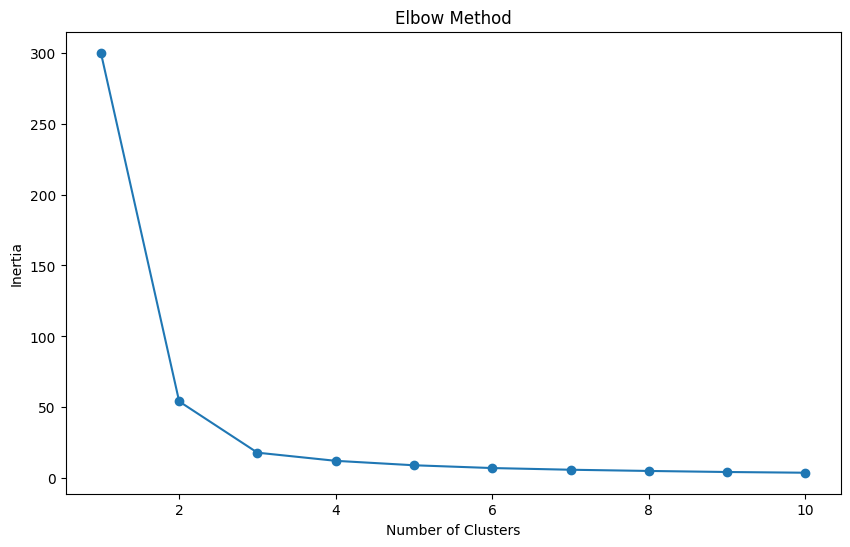

In [117]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [118]:
# Based on the Elbow Method, let's choose the number of clusters as 3
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(data_scaled)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

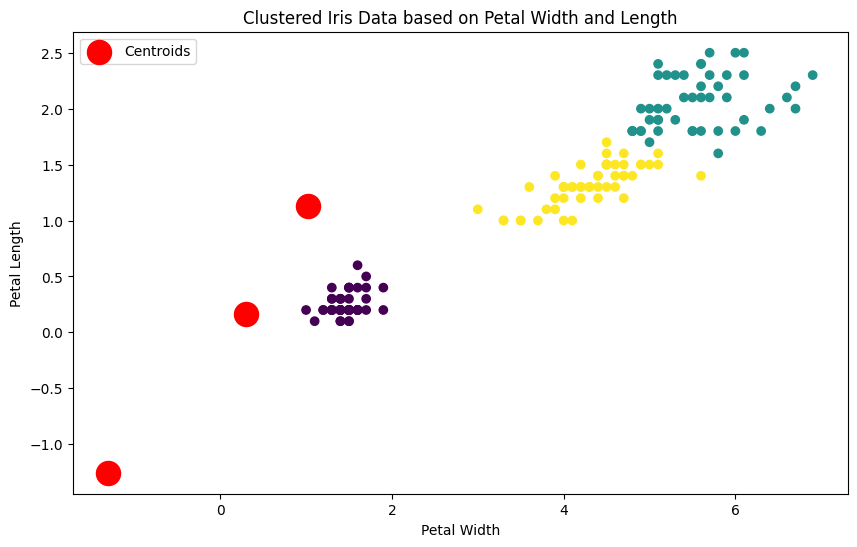

In [119]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clustered Iris Data based on Petal Width and Length')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction

Load heart disease dataset in pandas dataframe

Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

Convert text columns to numbers using label encoding / one hot encoding

Apply scaling

Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy

In [120]:
from io import StringIO
# Load the dataset from the CSV file
df = pd.read_csv(r"C:\Users\asus\Downloads\heart.csv")

# Display the DataFrame
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [121]:
from scipy.stats import zscore

# Compute Z-scores for numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns
z_scores = zscore(df[numeric_columns])

# Find indices of outliers
outlier_indices = (z_scores > 3) | (z_scores < -3)

# Remove rows with outliers
df_no_outliers = df[~outlier_indices]

# Display the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (918, 12)


In [122]:
# Convert categorical columns using one-hot encoding
categorical_columns = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_M  \
0   40        140          289    172      0.0             0   True   
1   49        160          180    156      1.0             1  False   
2   37        130          283     98      0.0             0   True   
3   48        138          214    108      1.5             1  False   
4   54        150          195    122      0.0             0   True   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  FastingBS_1  \
0               True              False             False        False   
1              False               True             False        False   
2               True              False             False        False   
3              False              False             False        False   
4              False               True             False        False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False   

In [123]:
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to features
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
print(X_scaled[:5])

[[-1.4331398   0.41090889  0.82507026  1.38292822 -0.83243239  0.51595242
   2.07517671 -0.53283777 -0.22967867 -0.55134134  0.81427482 -0.49044933
  -0.8235563  -1.00218103  1.15067399]
 [-0.47848359  1.49175234 -0.17196105  0.75415714  0.10566353 -1.93816322
  -0.48188667  1.87674385 -0.22967867 -0.55134134  0.81427482 -0.49044933
  -0.8235563   0.99782372 -0.86905588]
 [-1.75135854 -0.12951283  0.7701878  -1.52513802 -0.83243239  0.51595242
   2.07517671 -0.53283777 -0.22967867 -0.55134134 -1.22808661  2.03894663
  -0.8235563  -1.00218103  1.15067399]
 [-0.5845565   0.30282455  0.13903954 -1.13215609  0.57471149 -1.93816322
  -0.48188667 -0.53283777 -0.22967867 -0.55134134  0.81427482 -0.49044933
   1.21424608  0.99782372 -0.86905588]
 [ 0.05188098  0.95133062 -0.0347549  -0.5819814  -0.83243239  0.51595242
  -0.48188667  1.87674385 -0.22967867 -0.55134134  0.81427482 -0.49044933
  -0.8235563  -1.00218103  1.15067399]]


In [124]:
# Display the first few rows of the encoded DataFrame
print(X.head())
print(y.head())

   Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex_M  ChestPainType_ATA  \
0   40        140          289    172      0.0   True               True   
1   49        160          180    156      1.0  False              False   
2   37        130          283     98      0.0   True               True   
3   48        138          214    108      1.5  False              False   
4   54        150          195    122      0.0   True              False   

   ChestPainType_NAP  ChestPainType_TA  FastingBS_1  RestingECG_Normal  \
0              False             False        False               True   
1               True             False        False               True   
2              False             False        False              False   
3              False             False        False               True   
4               True             False        False               True   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  
0          False             Fals

In [125]:
# Initialize classifiers
svm_classifier = SVC()
logreg_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()

In [126]:
# Train classifiers on original data
svm_classifier.fit(X_train, y_train)
logreg_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [127]:
# Predict using the trained classifiers
y_pred_svm = svm_classifier.predict(X_test)
y_pred_logreg = logreg_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)


In [128]:
# Calculate accuracy for each classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [129]:
print("Accuracy of SVM:", accuracy_svm)
print("Accuracy of Logistic Regression:", accuracy_logreg)
print("Accuracy of Random Forest:", accuracy_rf)

Accuracy of SVM: 0.7010869565217391
Accuracy of Logistic Regression: 0.8478260869565217
Accuracy of Random Forest: 0.8586956521739131


In [130]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=5)

In [131]:
# Fit and transform PCA on training data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [132]:
# Retrain classifiers using PCA-transformed features
svm_classifier.fit(X_train_pca, y_train)
logreg_classifier.fit(X_train_pca, y_train)
rf_classifier.fit(X_train_pca, y_train)

RandomForestClassifier()

In [133]:
# Predict using the trained classifiers on PCA-transformed data
y_pred_svm_pca = svm_classifier.predict(X_test_pca)
y_pred_logreg_pca = logreg_classifier.predict(X_test_pca)
y_pred_rf_pca = rf_classifier.predict(X_test_pca)

In [134]:

# Calculate accuracy for each classifier on PCA-transformed data
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
accuracy_logreg_pca = accuracy_score(y_test, y_pred_logreg_pca)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)

In [135]:
print("Accuracy of SVM with PCA:", accuracy_svm_pca)
print("Accuracy of Logistic Regression with PCA:", accuracy_logreg_pca)
print("Accuracy of Random Forest with PCA:", accuracy_rf_pca)

Accuracy of SVM with PCA: 0.7065217391304348
Accuracy of Logistic Regression with PCA: 0.8097826086956522
Accuracy of Random Forest with PCA: 0.7934782608695652
